In [1]:
import os
from copy import deepcopy
from pathlib import Path
import random
import shutil

from tqdm import tqdm
from pprint import pprint
import pandas as pd
import numpy as np
import nibabel as nib

from bcblib.tools.general_utils import open_json, save_json
from lesseg_unet.utils import get_sex_int, get_age_int

%load_ext autoreload
%autoreload 2

In [35]:
from lesseg_unet.utils import get_perf_seg_dict, get_perf_seg_dict_from_folders
"""
First we need to create a dictionary with the segmentation files and the performance
"""
"""
INPUTS
"""
# Model trained with abnormals only (but with gen dice + focal loss)
# seg_folder = '/media/chrisfoulon/HDD2/final_training_set/abnormal_5fold_segmentation/'
# output_folder = '/media/chrisfoulon/HDD2/final_training_set/perf_labels_analyses_abnormal_5fold_segmentation/'
# Model trained with both abnormals and ALL the controls (but with gen dice + focal loss)
# seg_folder = '/media/chrisfoulon/HDD2/final_training_set/controls_trained_5fold_segmentation/'
# output_folder = '/media/chrisfoulon/HDD2/final_training_set/perf_labels_analyses_controls_5fold_segmentation/'
# Model trained with both abnormals and the controls (but with gen dice + focal loss) without  biobank images
# seg_folder = '/media/chrisfoulon/HDD2/final_training_set/training_with_controls_gendice_focal_no_biobank_segmentation'
# output_folder = '/media/chrisfoulon/HDD2/final_training_set/perf_labels_training_with_controls_gendice_focal_no_biobank/'

# Model trained with both abnormals and ALL the controls with dice + focal loss and a 0.1 weight on control loss
# seg_folder = '/media/chrisfoulon/HDD2/final_training_set/control_training_wf_div10_dicefocal'
# output_folder = '/media/chrisfoulon/HDD2/final_training_set/perf_labels_control_training_wf_div10_dicefocal/'
# Model trained with both abnormals and ALL the controls with dice + focal loss and a 0.001 weight on control loss
# seg_folder = '/media/chrisfoulon/HDD2/final_training_set/control_training_wf_div1000_dicefocal'
# output_folder = '/media/chrisfoulon/HDD2/final_training_set/perf_labels_control_training_wf_div1000_dicefocal/'

# Simple UNet trained with abnormals only and without any augmentation
# seg_folder = '/media/chrisfoulon/HDD2/final_training_set/abnormal_training_no_augs_unet'
# output_folder = '/media/chrisfoulon/HDD2/final_training_set/perf_labels_abnormal_training_no_augs_unet/'

# /media/chrisfoulon/HDD2/final_training_set/abnormal_segmentation_dice_focal
seg_folder = '/media/chrisfoulon/HDD2/final_training_set/abnormal_segmentation_dice_focal'
output_folder = '/media/chrisfoulon/HDD2/final_training_set/perf_labels_abnormal_segmentation_dice_focal/'


In [36]:


spm_seg_folder = Path(output_folder, 'spm_segmentation')
os.makedirs(output_folder, exist_ok=True)
os.makedirs(spm_seg_folder, exist_ok=True)

keys_struct = open_json('/media/chrisfoulon/HDD2/final_training_set/cleaned_abnormal_b1000_info_dict.json')

if Path(seg_folder, '__output_image_volumes.json').exists():
    seg_dict = get_perf_seg_dict(seg_folder, keys_struct=keys_struct, relative_output_paths=False)
else:
    print('process from folders')
    seg_dict = get_perf_seg_dict_from_folders(seg_folder, keys_struct=keys_struct, relative_output_paths=False)
# print first value of the dict
pprint({k: seg_dict[k] for k in random.sample(seg_dict.keys(), 1)})
# Then we need to copy the segmentation files to a separate folder for SPM ...
output_masks_folder = Path(output_folder, 'output_masks/')
output_labels_folder = Path(output_folder, 'output_labels/')
os.makedirs(output_masks_folder, exist_ok=True)
os.makedirs(output_labels_folder, exist_ok=True)
spm_seg_dict = {}
main_key_to_process = 'label'
# main_key_to_process = 'segmentation'
for k in tqdm(seg_dict):
    shutil.copy(seg_dict[k]['segmentation'], output_masks_folder)
    shutil.copy(seg_dict[k]['label'], output_labels_folder)
    spm_seg_dict[k] = deepcopy(seg_dict[k])
    spm_seg_dict[k][main_key_to_process] = str(Path(spm_seg_folder, Path(seg_dict[k][main_key_to_process]).name.split('.gz')[0]))
    nib.save(nib.load(seg_dict[k][main_key_to_process]), spm_seg_dict[k][main_key_to_process])
print(len(seg_dict))
pprint({k: seg_dict[k] for k in random.sample(seg_dict.keys(), 1)})

save_json(Path(seg_folder, 'perf_seg_dict.json'), seg_dict)
save_json(Path(seg_folder, 'spm_perf_seg_dict.json'), spm_seg_dict)

process from folders


100%|██████████| 712/712 [00:31<00:00, 22.60it/s]
/tmp/ipykernel_8566/868534614.py:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  pprint({k: seg_dict[k] for k in random.sample(seg_dict.keys(), 1)})


{'wodctH25_b1000_clmp_b1000_40620284_M_19560619_20110512_SIEMENS_Avanto_15_MRHead_ep2d_diff_3scan_ep_b1000t_1': {'Unnamed: 0': 527,
                                                                                                                 'b1000': '/media/chrisfoulon/HDD2/final_training_set/cleaned_abnormal_images/wodctH25_b1000_clmp_b1000_40620284_M_19560619_20110512_SIEMENS_Avanto_15_MRHead_ep2d_diff_3scan_ep_b1000t_1.nii.gz',
                                                                                                                 'core_filename': 'wodctH25_b1000_clmp_b1000_40620284_M_19560619_20110512_SIEMENS_Avanto_15_MRHead_ep2d_diff_3scan_ep_b1000t_1_v1642v',
                                                                                                                 'dice_metric': 0.9434977769851683,
                                                                                                                 'distance': 1.0,
                                   

100%|██████████| 3563/3563 [02:05<00:00, 28.48it/s]
/tmp/ipykernel_8566/868534614.py:29: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  pprint({k: seg_dict[k] for k in random.sample(seg_dict.keys(), 1)})


3563
{'wodctH25_b1000_clmp_b1000_40568395_F_19490118_20101119_SIEMENS_Avanto_15_MRHead_ep2d_diff_3scan_ipat_ep_b1000t_1': {'Unnamed: 0': 64,
                                                                                                                      'b1000': '/media/chrisfoulon/HDD2/final_training_set/cleaned_abnormal_images/wodctH25_b1000_clmp_b1000_40568395_F_19490118_20101119_SIEMENS_Avanto_15_MRHead_ep2d_diff_3scan_ipat_ep_b1000t_1.nii.gz',
                                                                                                                      'core_filename': 'wodctH25_b1000_clmp_b1000_40568395_F_19490118_20101119_SIEMENS_Avanto_15_MRHead_ep2d_diff_3scan_ipat_ep_b1000t_1_v329v',
                                                                                                                      'dice_metric': 0.945945918560028,
                                                                                                                      'distance': 1.0

In [37]:
"""
Then we need to create a dataframe with the performance metrics
"""
columns=[main_key_to_process, 'dice_metric', 'distance', 'volume', 'lesion_cluster', 'PatientAge', 'PatientSex']
b1000_info_dict = open_json('/media/chrisfoulon/HDD2/final_training_set/cleaned_abnormal_b1000_info_dict.json')


# dict_for_df = {}
# for k in seg_dict:
#     for col in columns:
#         if col in seg_dict:
#             dict_for_df[k][col] = seg_dict[k][col]
#         else:
#             dict_for_df[k][col] = b1000_info_dict[k][col]
#
# pprint({k: dict_for_df[k] for k in random.sample(dict_for_df.keys(), 1)})
# new_df = pd.DataFrame.from_records(dict_for_df).T
# new_df.to_csv(Path(seg_folder, 'segmentation_perf_df.csv'), columns=columns)

# create a function to do that
def get_df_from_dict(seg_dict, columns):
    dict_for_df = {}
    for k in seg_dict:
        dict_for_df[k] = {}
        for col in columns:
            if col in seg_dict[k]:
                if col == 'PatientAge':
                    dict_for_df[k][col] = get_age_int(seg_dict[k][col])
                elif col == 'PatientSex':
                    dict_for_df[k][col] = get_sex_int(seg_dict[k][col])
                else:
                    dict_for_df[k][col] = seg_dict[k][col]
            elif col == 'lesion_cluster':
                dict_for_df[k][col] = Path(seg_dict[k][main_key_to_process]).parent.name
            else:
                if col == 'PatientAge':
                    dict_for_df[k][col] = get_age_int(b1000_info_dict[k][col])
                elif col == 'PatientSex':
                    dict_for_df[k][col] = get_sex_int(b1000_info_dict[k][col])
                else:
                    dict_for_df[k][col] = b1000_info_dict[k][col]
    new_df = pd.DataFrame.from_records(dict_for_df).T
    return new_df

# use it on seg_dict and spm_seg_dict
new_df = get_df_from_dict(seg_dict, columns)
new_df.to_csv(Path(output_folder, 'segmentation_perf_df.csv'), columns=columns)
new_df = get_df_from_dict(spm_seg_dict, columns)
new_df.to_csv(Path(output_folder, 'spm_segmentation_perf_df.csv'), columns=columns)

In [38]:
"""
Then we need to zscore the columns
"""
zcores_columns = ['dice_metric', 'distance', 'volume', 'PatientAge', 'PatientSex']
for col in zcores_columns:
    # pd.to_numeric(new_df[col])
    new_df[col] = new_df[col].infer_objects()
#     print(col)
#     print(new_df[col].dtype)
#     new_df[col] = new_df[col].apply(stats.zscore)
normalized_df = new_df[zcores_columns]
normalized_df=(normalized_df-normalized_df.mean())/normalized_df.std()
normalized_df=(normalized_df-normalized_df.min())/(normalized_df.max()-normalized_df.min())
new_df[zcores_columns] = normalized_df[zcores_columns]
new_df.to_csv(Path(seg_folder, 'segmentation_perf_df_zscored.csv'), columns=columns)

In [39]:
from nilearn.image import smooth_img
# smooth all the images from the segmentation dict with key 'segmentation' and save them in '/media/chrisfoulon/HDD2/final_training_set/abnormal_5fold_segmentation_masks_smoothed_8'
smooth_out_folder = output_folder + 'masks_smoothed_8'
os.makedirs(smooth_out_folder, exist_ok=True)
spm_smoothed_seg_dict = {}
for k in tqdm(spm_seg_dict):
    smoothed_img = smooth_img(spm_seg_dict[k][main_key_to_process], 8)
    spm_smoothed_seg_dict[k] = deepcopy(spm_seg_dict[k])
    spm_smoothed_seg_dict[k][main_key_to_process] = str(Path(smooth_out_folder, Path(spm_seg_dict[k][main_key_to_process]).name))
    nib.save(smoothed_img, spm_smoothed_seg_dict[k][main_key_to_process])



100%|██████████| 3563/3563 [03:40<00:00, 16.14it/s]


In [40]:
new_df = get_df_from_dict(spm_smoothed_seg_dict, columns)
new_df.to_csv(Path(output_folder, 'spm_smoothed_segmentation_perf_df.csv'), columns=columns)
# STOP HERE FOR SIMPLE MODEL/DICE SPM COMPARISON

In [4]:
# Now, we use the spm_smoothed_segmentation_perf_df.csv from each directory in model_perf_dir_list and create a new multi_model_dice_comparison_df
model_perf_dir_list = [
    '/media/chrisfoulon/HDD2/final_training_set/perf_labels_analyses_abnormal_5fold_segmentation',
    '/media/chrisfoulon/HDD2/final_training_set/perf_labels_control_training_wf_div10_dicefocal',
    '/media/chrisfoulon/HDD2/final_training_set/perf_labels_control_training_wf_div1000_dicefocal',
    '/media/chrisfoulon/HDD2/final_training_set/perf_labels_training_with_controls_gendice_focal_no_biobank'
]

model_perf_df_list = [
    pd.read_csv(Path(model_perf_dir, 'spm_smoothed_segmentation_perf_df.csv'), index_col=0)
    for model_perf_dir in model_perf_dir_list
]

multi_model_dice_comparison_df = pd.DataFrame()
# add the 'label' column of the first df to multi_model_dice_comparison_df
multi_model_dice_comparison_df['label'] = model_perf_df_list[0]['label']
# add the 'dice_metric' column of each df to multi_model_dice_comparison_df (with folder name as column name + '_dice_metric')
for i, model_perf_df in enumerate(model_perf_df_list):
    multi_model_dice_comparison_df[model_perf_dir_list[i].split('/')[-1] + '_dice_metric'] = model_perf_df['dice_metric']

b1000_ground_truths_label_seize_dict = open_json('/media/chrisfoulon/HDD2/final_training_set/cleaned_abnormal_b1000_info_dict_label_size.json')

# keys in b1000_ground_truths_label_seize_dict are the same as in multi_model_dice_comparison_df[0] first column. Match them and add the label size to multi_model_dice_comparison_df
multi_model_dice_comparison_df['label_size'] = [b1000_ground_truths_label_seize_dict[k]['label_size']  for k in multi_model_dice_comparison_df.index]

# save the multi_model_dice_comparison_df
multi_model_dice_comparison_df.to_csv('/media/chrisfoulon/HDD2/final_training_set/multi_model_dice_comparison_df.csv', columns=multi_model_dice_comparison_df.columns)

In [ ]:
from lesseg_unet.utils import weight_lesion_dataset

biobank_ctr_folder_name = 'perf_analyses_controls_5fold_segmentation'
no_biobank_ctr_folder_name = 'perf_training_with_controls_gendice_focal_no_biobank'
ctr_folder_name = no_biobank_ctr_folder_name

abnormal_df_path = Path('/media/chrisfoulon/HDD2/final_training_set/perf_analyses_abnormal_5fold_segmentation/', 'spm_smoothed_segmentation_perf_df.csv')
controls_df_path = Path(f'/media/chrisfoulon/HDD2/final_training_set/{ctr_folder_name}/', 'spm_smoothed_segmentation_perf_df.csv')

abnormal_weighted_output_folder = Path('/media/chrisfoulon/HDD2/final_training_set/perf_analyses_abnormal_5fold_segmentation/', 'dice_weighted_smoothed_lesions')
controls_weighted_output_folder = Path(f'/media/chrisfoulon/HDD2/final_training_set/{ctr_folder_name}/', 'dice_weighted_smoothed_lesions')

# weight the images of the abnormal dataset
abnormal_weighted_dict, abnormal_weighted_df = weight_lesion_dataset(abnormal_df_path, 'segmentation', 'dice_metric', abnormal_weighted_output_folder, 'Unnamed: 0')
# save the weighted dataframe
abnormal_weighted_df.to_csv(Path('/media/chrisfoulon/HDD2/final_training_set/perf_analyses_abnormal_5fold_segmentation/', 'dice_weighted_smoothed_lesions_segmentation_perf_df.csv'), columns=abnormal_weighted_df.columns)

# weight the images of the controls dataset
controls_weighted_dict, controls_weighted_df = weight_lesion_dataset(controls_df_path, 'segmentation', 'dice_metric', controls_weighted_output_folder, 'Unnamed: 0')
# save the weighted dataframe
controls_weighted_df.to_csv(Path(f'/media/chrisfoulon/HDD2/final_training_set/{ctr_folder_name}/', 'dice_weighted_smoothed_lesions_segmentation_perf_df.csv'), columns=controls_weighted_df.columns)


# for each row in abnormal_weighted_df, find the corresponding row in controls_weighted_df using 'Unnamed: 0'
# then compute the substraction of the nifti images in 'weighted_path' and save the result in a new folder
dice_substraction_folder = Path('/media/chrisfoulon/HDD2/final_training_set/', 'dice_subtraction_smoothed_lesions_no_biobank')
os.makedirs(dice_substraction_folder, exist_ok=True)
for row in tqdm(abnormal_weighted_df.iterrows()):
    key = row[1]['Unnamed: 0']
    abnormal_path = row[1]['weighted_path']
    abnormal_nifti = nib.load(abnormal_path)
    abnormal_data = abnormal_nifti.get_fdata()
    control_path = controls_weighted_df[controls_weighted_df['Unnamed: 0'] == key]['weighted_path'].values[0]
    control_nifti = nib.load(control_path)
    control_data = control_nifti.get_fdata()
    dice_substraction = abnormal_data - control_data
    dice_substraction_nifti = nib.Nifti1Image(dice_substraction, affine=abnormal_nifti.affine)
    nib.save(dice_substraction_nifti, Path(dice_substraction_folder, Path(abnormal_path).name.replace('.nii.gz', '.nii')))

In [4]:
# Now, we want to compute the mean dice_metric between a list of perf_seg_dict and save the {key: 'mean_dice_metric': value, 'mean_distance': value_average_distance} in a new dict
perf_seg_dict_list = [
    open_json('/media/chrisfoulon/HDD2/final_training_set/abnormal_5fold_segmentation/perf_seg_dict.json'),
    open_json('/media/chrisfoulon/HDD2/final_training_set/controls_trained_5fold_segmentation/perf_seg_dict.json'),
    open_json('/media/chrisfoulon/HDD2/final_training_set/training_with_controls_gendice_focal_no_biobank_segmentation/perf_seg_dict.json'),
    open_json('/media/chrisfoulon/HDD2/final_training_set/control_training_wf_div10_dicefocal/perf_seg_dict.json'),
    open_json('/media/chrisfoulon/HDD2/final_training_set/control_training_wf_div1000_dicefocal/perf_seg_dict.json')
]

mean_dice_dict = {}
for k in perf_seg_dict_list[0]:
    mean_dice_dict[k] = {}
    mean_dice_dict[k]['mean_dice_metric'] = np.mean([d[k]['dice_metric'] for d in perf_seg_dict_list])
    mean_dice_dict[k]['mean_distance'] = np.mean([d[k]['distance'] for d in perf_seg_dict_list])
    
# sort the dict by mean_dice_metric (ascending)
mean_dice_dict = {k: v for k, v in sorted(mean_dice_dict.items(), key=lambda item: item[1]['mean_dice_metric'])}
    
save_json(Path('/media/chrisfoulon/HDD2/final_training_set/', 'mean_dice_dict.json'), mean_dice_dict)

In [4]:
mean_dice_dict = open_json('/media/chrisfoulon/HDD2/final_training_set/mean_dice_dict.json')
# print all values with mean_distance = 0
for k in mean_dice_dict:
    if mean_dice_dict[k]['mean_distance'] == 0:
        print(k)
        print(mean_dice_dict[k]['mean_dice_metric'])
        print(mean_dice_dict[k]['mean_distance'])

DTI_P6d_noniso_SENSE_20150731120209_301__pref__
0.0
0.0
DTI_P6d_noniso_SENSE_20180301104234_201__pref__
0.0
0.0
DTI_P6d_noniso_SENSE_20160618125529_201__pref__
0.0
0.0
ep2d_diff_3scan_trace_20070324110557_9__pref__
0.0
0.0
ep2d_diff_3scan_ipat_20141022143252_6__pref__
0.0
0.0
DTI_P6d_noniso_SENSE_20160722100258_201__pref__
0.0
0.0
DTI_P6d_noniso_SENSE_20160711083742_201__pref__
0.0
0.0
DTI_P6d_noniso_20190112135713_201__pref__
0.9755767226219177
0.0
1.3.46.670589.11.38075.5.0.1820.2018040815523831006_20180408155238_201__pref__
0.9875420689582824
0.0
DTI_P6d_noniso_20190315163801_201__pref__
0.987842321395874
0.0
1.2.840.846310145.12.1.1.60286619_20180831163807_201__pref__
0.9879709959030152
0.0
1.2.840.846310145.12.1.1.60317294_20180915142847_201__pref__
0.9880144834518433
0.0
1.2.840.846310145.12.1.1.60692052_20190315163801_201__pref__
0.9884455084800721
0.0
DTI_P6d_noniso_SENSE_20180718155058_201__pref__
0.9889434337615967
0.0
DTI_P6d_noniso_SENSE_20151214153600_301__pref__
0.9917016

In [12]:
from bcblib.tools.visualisation import display_img

perf_seg_dict_list = [
    open_json('/media/chrisfoulon/HDD2/final_training_set/abnormal_5fold_segmentation/perf_seg_dict.json'),
    open_json('/media/chrisfoulon/HDD2/final_training_set/controls_trained_5fold_segmentation/perf_seg_dict.json'),
    open_json('/media/chrisfoulon/HDD2/final_training_set/training_with_controls_gendice_focal_no_biobank_segmentation/perf_seg_dict.json'),
    open_json('/media/chrisfoulon/HDD2/final_training_set/control_training_wf_div10_dicefocal/perf_seg_dict.json'),
    open_json('/media/chrisfoulon/HDD2/final_training_set/control_training_wf_div1000_dicefocal/perf_seg_dict.json')
]
# For every image with a mean_dice_metric <= 0, display perf_seg_dict_list[-2][k]['b1000'] with display_img
for k in mean_dice_dict:
    if 0.01 < mean_dice_dict[k]['mean_dice_metric'] <= 0.2 and 0.5 < mean_dice_dict[k]['mean_distance'] < 3:
        print(k)
        print(mean_dice_dict[k]['mean_dice_metric'])
        print(mean_dice_dict[k]['mean_distance'])
        # display_img(perf_seg_dict_list[-2][k]['b1000'], perf_seg_dict_list[-2][k]['label'], display='fsleyes')
        display_img(perf_seg_dict_list[-2][k]['b1000'], perf_seg_dict_list[-2][k]['label'], perf_seg_dict_list[-2][k]['segmentation'], display='fsleyes')

DTI_P6d_noniso_SENSE_20151112143421_301__pref__
0.04636363759636878
2.9771296018981586
Fsleyes command: "fsleyes /media/chrisfoulon/HDD2/final_training_set/cleaned_abnormal_images/non_linear_co-rigid_rigid_geomean_denoise_DTI_P6d_noniso_SENSE_20151112143421_301__pref___bval1000.nii.gz /media/chrisfoulon/HDD2/final_training_set/control_training_wf_div10_dicefocal/fold_2/val_images/empty_prediction/label_non_linear_co-rigid_rigid_geomean_denoise_DTI_P6d_noniso_SENSE_20151112143421_301__pref___bval1000_v0v_71.nii.gz -cm red -a 40 /media/chrisfoulon/HDD2/final_training_set/control_training_wf_div10_dicefocal/fold_2/val_images/empty_prediction/output_non_linear_co-rigid_rigid_geomean_denoise_DTI_P6d_noniso_SENSE_20151112143421_301__pref___bval1000_v0v_71.nii.gz -cm green -a 40"
Error/Warning during fsleyes execution
exit status: 0
stderr: given by the platformdirs library.  To remove this warning and
see the appropriate new directories, set the environment variable
`JUPYTER_PLATFORM_DIRS=1`

KeyboardInterrupt: 

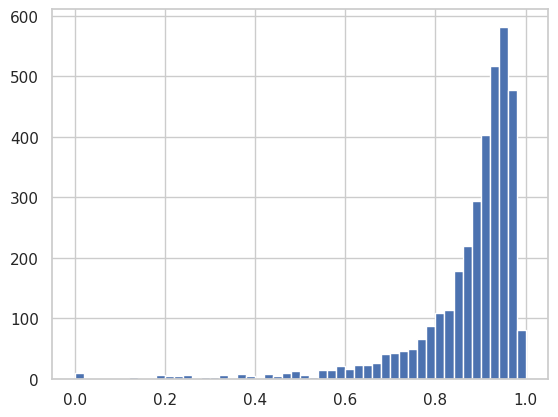

In [12]:
# plot the distribution of the mean_dice_metric
import matplotlib.pyplot as plt
plt.hist([mean_dice_dict[k]['mean_dice_metric'] for k in mean_dice_dict], bins=50)
plt.show()

In [ ]:
perf_seg_dict_list = [
    open_json('/media/chrisfoulon/HDD2/final_training_set/abnormal_5fold_segmentation/perf_seg_dict.json'),
    open_json('/media/chrisfoulon/HDD2/final_training_set/controls_trained_5fold_segmentation/perf_seg_dict.json'),
    open_json('/media/chrisfoulon/HDD2/final_training_set/training_with_controls_gendice_focal_no_biobank_segmentation/perf_seg_dict.json'),
    open_json('/media/chrisfoulon/HDD2/final_training_set/control_training_wf_div10_dicefocal/perf_seg_dict.json'),
    open_json('/media/chrisfoulon/HDD2/final_training_set/control_training_wf_div1000_dicefocal/perf_seg_dict.json')
]

perf_seg_dict_parent_folder_name_list = [
    'abnormal_5fold_segmentation',
    'controls_trained_5fold_segmentation',
    'training_with_controls_gendice_focal_no_biobank_segmentation',
    'control_training_wf_div10_dicefocal',
    'control_training_wf_div1000_dicefocal'
]

# display the distribution of the dice_metric for each dataset related to the volume of the lesion and compute the correlation between the two on each plot 
from scipy.stats import pearsonr
# make plots taller and larger
plt.rcParams['figure.figsize'] = [20, 15]
for i, perf_seg_dict in enumerate(perf_seg_dict_list):
    # print(perf_seg_dict_parent_folder_name_list[i])
    plt.scatter([perf_seg_dict[k]['volume'] for k in perf_seg_dict], [perf_seg_dict[k]['dice_metric'] for k in perf_seg_dict])
    corr = pearsonr([perf_seg_dict[k]['volume'] for k in perf_seg_dict], [perf_seg_dict[k]['dice_metric'] for k in perf_seg_dict])
    plt.title(f'{perf_seg_dict_parent_folder_name_list[i]} / corr: {corr[0]:.2f}')
    plt.show()
    print(corr)

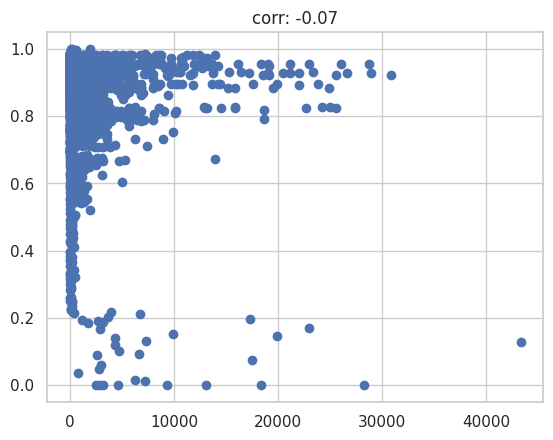

PearsonRResult(statistic=-0.07214794158358694, pvalue=1.627528355889108e-05)


In [18]:
# do the same but for the label size from b1000_label_dict and the mean_dice_metric from the mean_dice_dict
b1000_label_dict = open_json('/media/chrisfoulon/HDD2/final_training_set/cleaned_abnormal_b1000_info_dict_label_size.json')
plt.scatter([b1000_label_dict[k]['label_size'] for k in b1000_label_dict], [mean_dice_dict[k]['mean_dice_metric'] for k in mean_dice_dict])
corr = pearsonr([b1000_label_dict[k]['label_size'] for k in b1000_label_dict], [mean_dice_dict[k]['mean_dice_metric'] for k in mean_dice_dict])
plt.title(f'corr: {corr[0]:.2f}')
plt.show()
print(corr)


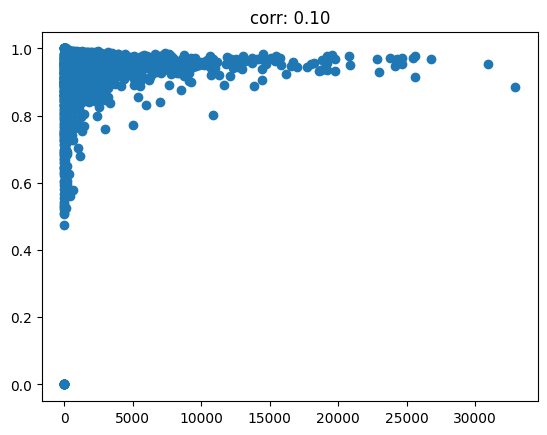

In [22]:
# plot lesion volume function of distance_ratio and display the correlation
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
# '/media/chrisfoulon/HDD2/final_training_set/abnormal_5fold_segmentation/perf_seg_dict_with_distance_ratio.json'
perf_seg_dict = open_json('/media/chrisfoulon/HDD2/final_training_set/abnormal_5fold_segmentation/perf_seg_dict_with_distance_ratio.json')
plt.scatter([perf_seg_dict[k]['volume'] for k in perf_seg_dict], [perf_seg_dict[k]['dice_dist_ratio'] for k in perf_seg_dict])
corr = pearsonr([perf_seg_dict[k]['volume'] for k in perf_seg_dict], [perf_seg_dict[k]['dice_dist_ratio'] for k in perf_seg_dict])
plt.title(f'corr: {corr[0]:.2f}')
plt.show()

In [42]:
from lesseg_unet.loss_and_metric import distance_ratio_volume

def perf_seg_dict_add_distance_ratio(perf_seg_dict_path, output_path):
    perf_seg_dict = open_json(perf_seg_dict_path)
    for k in tqdm(perf_seg_dict):
        # add the distance_ratio to the perf_seg_dict and then add the average of dice_metric and distance_ratio to the dice_dist_ratio 
        perf_seg_dict[k]['distance_ratio'] = distance_ratio_nifti(perf_seg_dict[k]['label'], perf_seg_dict[k]['segmentation'])
        perf_seg_dict[k]['dice_dist_ratio'] = (perf_seg_dict[k]['dice_metric'] + perf_seg_dict[k]['distance_ratio']) / 2
    # sort the dict by dice_dist_ratio (ascending)
    perf_seg_dict = {k: v for k, v in sorted(perf_seg_dict.items(), key=lambda item: item[1]['dice_dist_ratio'])}
    # save the perf_seg_dict
    save_json(output_path, perf_seg_dict)

perf_seg_dict_list = [
    # '/media/chrisfoulon/HDD2/final_training_set/abnormal_5fold_segmentation/perf_seg_dict.json',
    # '/media/chrisfoulon/HDD2/final_training_set/controls_trained_5fold_segmentation/perf_seg_dict.json',
    # '/media/chrisfoulon/HDD2/final_training_set/training_with_controls_gendice_focal_no_biobank_segmentation/perf_seg_dict.json',
    # '/media/chrisfoulon/HDD2/final_training_set/control_training_wf_div10_dicefocal/perf_seg_dict.json',
    # '/media/chrisfoulon/HDD2/final_training_set/control_training_wf_div1000_dicefocal/perf_seg_dict.json',
    '/media/chrisfoulon/HDD2/final_training_set/abnormal_segmentation_dice_focal/perf_seg_dict.json'
]

# run perf_seg_dict_add_distance_ratio on each perf_seg_dict
for perf_seg_dict in perf_seg_dict_list:
    perf_seg_dict_add_distance_ratio(perf_seg_dict, perf_seg_dict.replace('.json', '_with_distance_ratio.json'))

  4%|▍         | 154/3563 [00:04<01:21, 41.85it/s]/home/chrisfoulon/miniconda3/lib/python3.10/site-packages/monai/metrics/hausdorff_distance.py:193: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(f"the prediction of class {c} is all 0, this may result in nan/inf distance.")
/home/chrisfoulon/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
100%|██████████| 3563/3563 [01:30<00:00, 39.40it/s]


In [43]:
# list paths of _with_distance_ratio perf_seg_dict
perf_seg_dict_with_distance_ratio_list = [
    '/media/chrisfoulon/HDD2/final_training_set/abnormal_5fold_segmentation/perf_seg_dict_with_distance_ratio.json',
    '/media/chrisfoulon/HDD2/final_training_set/controls_trained_5fold_segmentation/perf_seg_dict_with_distance_ratio.json',
    '/media/chrisfoulon/HDD2/final_training_set/training_with_controls_gendice_focal_no_biobank_segmentation/perf_seg_dict_with_distance_ratio.json',
    '/media/chrisfoulon/HDD2/final_training_set/control_training_wf_div10_dicefocal/perf_seg_dict_with_distance_ratio.json',
    '/media/chrisfoulon/HDD2/final_training_set/control_training_wf_div1000_dicefocal/perf_seg_dict_with_distance_ratio.json'
    '/media/chrisfoulon/HDD2/final_training_set/abnormal_segmentation_dice_focal/perf_seg_dict_with_distance_ratio.json'
]

# load each of them and print the name of the file and the mean of all the dice_metric, distance, distance_ratio and dice_dist_ratio and volume (all the keys in the dict)
# for perf_seg_dict in perf_seg_dict_with_distance_ratio_list:
#     print(Path(perf_seg_dict).name)
#     perf_seg_dict = open_json(perf_seg_dict)
#     print(np.mean([perf_seg_dict[k]['dice_metric'] for k in perf_seg_dict]))
#     print(np.mean([perf_seg_dict[k]['distance'] for k in perf_seg_dict]))
#     print(np.mean([perf_seg_dict[k]['distance_ratio'] for k in perf_seg_dict]))
#     print(np.mean([perf_seg_dict[k]['dice_dist_ratio'] for k in perf_seg_dict]))
#     print(np.mean([perf_seg_dict[k]['volume'] for k in perf_seg_dict]))
#     print()
    
# instead the values should be displayed next to each other (one line per perf_seg_dict)

for perf_seg_dict in perf_seg_dict_with_distance_ratio_list:
    print(Path(perf_seg_dict).parent.name)
    perf_seg_dict = open_json(perf_seg_dict)
    print(np.mean([perf_seg_dict[k]['dice_metric'] for k in perf_seg_dict]), end=' ')
    print(np.mean([perf_seg_dict[k]['distance'] for k in perf_seg_dict]), end=' ')
    print(np.mean([perf_seg_dict[k]['distance_ratio'] for k in perf_seg_dict]), end=' ')
    print(np.mean([perf_seg_dict[k]['dice_dist_ratio'] for k in perf_seg_dict]), end=' ')
    print(np.mean([perf_seg_dict[k]['volume'] for k in perf_seg_dict]), end=' ')
    print()
    

abnormal_5fold_segmentation
0.8767417732227846 3.0536868960945602 0.9798508924589319 0.9282963328408582 1287.0550098231827 
controls_trained_5fold_segmentation
0.8653619464540683 3.1977899177640716 0.9751108413831678 0.9202363939186182 1289.110861633455 
training_with_controls_gendice_focal_no_biobank_segmentation
0.8640696352581412 3.1693777748993397 0.976810409699441 0.9204400224787913 1266.066797642436 
control_training_wf_div10_dicefocal
0.8700511560548194 3.0248708811432015 0.9786163353959315 0.9243337457253755 1286.9980353634578 
abnormal_segmentation_dice_focal


NotADirectoryError: [Errno 20] Not a directory: '/media/chrisfoulon/HDD2/final_training_set/control_training_wf_div1000_dicefocal/perf_seg_dict_with_distance_ratio.json/media/chrisfoulon/HDD2/final_training_set/abnormal_segmentation_dice_focal/perf_seg_dict_with_distance_ratio.json'

In [32]:
from lesseg_unet.visualisation_utils import perf_dataset_overlap_from_json

# 
# nib.save(abn_overlap, '/media/chrisfoulon/HDD2/final_training_set/test_abnormal_gen_dice_focal_training/fold_0_abnormal_validation/val_perf_overlap.nii.gz')

# Compute the weighted overlap between the segmentation and the label for each image in the perf_seg_dict of the perf_seg_dict_with_distance_ratio_list
for perf_seg_dict_path in perf_seg_dict_with_distance_ratio_list:
    print(Path(perf_seg_dict_path).parent.name)
    perf_seg_dict = open_json(perf_seg_dict_path)
    overlap = perf_dataset_overlap_from_json(perf_seg_dict, 'segmentation', perf_key='dice_dist_ratio', non_zero_only=True)
    nib.save(overlap, Path(Path(perf_seg_dict_path).parent, 'dice_dist_ratio_overlap.nii.gz'))




abnormal_5fold_segmentation


100%|██████████| 3563/3563 [01:58<00:00, 30.02it/s]


controls_trained_5fold_segmentation


100%|██████████| 3563/3563 [01:11<00:00, 49.81it/s]


training_with_controls_gendice_focal_no_biobank_segmentation


100%|██████████| 3563/3563 [01:12<00:00, 49.46it/s]


control_training_wf_div10_dicefocal


100%|██████████| 3563/3563 [02:12<00:00, 26.95it/s]


control_training_wf_div1000_dicefocal


100%|██████████| 3563/3563 [01:56<00:00, 30.55it/s]


In [34]:
a = True
b = True
if a ^ b:
    print('XOR TRUE')
else:
    print('XOR FALSE')

XOR FALSE
